## Machine Learning A-Z™

© Kirill Eremenko, Hadelin de Ponteves, SuperDataScience Team |
[Super Data Science](http://www.superdatascience.com)

Part 6: Reinforcement Learning | Section 33: Thompson Sampling Algorithm

Created on Tue Apr  19, 2019
@author: yinka_ola

---

In [2]:
## ---

## Reinforcement Learning:
## Reinforcement Learning is a branch of Machine Learning, 
## also called Online Learning. It is used to solve interacting problems 
## where the data observed up to time t is considered to decide which action 
## to take at time t + 1. It is also used for Artificial Intelligence when 
## training machines to perform tasks such as walking. Desired outcomes provide 
## the AI with reward, undesired with punishment. Machines learn through trial and error.

## ---

## The multi-armed bandit problem:
## 1-hand bandit = slot machines with 1 handle
## multi-armed = multiple slot machines
## each machine has an associated random distribution
## your task is to figure out which one is the best
## explore quickly to maximize return
## regret: results when using non optimal method/machine

## modern aplication: Advertising (i.e)
## we have d arms (# of Ads displayed to users each time they connect to webpage)
## which ad works the best? (Coca Cola AD example)
## will users click or not click on the ad?
## consider A/B testing -> pure exploration
## combine exploration with exploitation
## goal: how do we cut this down? // maximize total reward at each round
## find the ideal balance/trade-off b/t exploration and exploitation

## ---

In [1]:
## Thompson Sampling Intuition:
## it is a probabilistic algorithm
## consider a scale (3 bandits)
## here: no prior knowledge of current situation of machines
## hence trial runs regards
## Thompson sampling will construct a distribution/perception of current state
## goal: recreating distrbtn of where the expected values might be


## Steps to implement Thompson Sampling:
## Bayesian inference // Bernoulli distribution
## step 1: at each round n, pick 2 numbers for each ad
## Ni1 = No when ad i gets a reward = 1 up to round n
## Ni0 = No when ad i gets a reward = 0 up to round n
## step 2: take random draw from distribution for each ad i
## step 3: select the ad with the highest value from step 2

## UCB vs. Thompson Sampling:
## UCB is deterministic (straight forward) - no randomness in algorithm
## with UCB, randomness is on the side of the machine
## UCB update at every round, you need the previous round for next round 

## Thompson Sampling is probabilistic: we generate random value from distrbn
## can accomodate delayed feedback
## has an edge over Thompson sampling, update not required at every round
## better empirical evidence


In [5]:
## ---

#Data Scenario: 
## Recall the car company selling affordable luxury SUV 
## On social network, marketing prepared 10 version great looking ads
## They have a limited budget
## find the best strategy + AD version that will lead to highest conversion rate
## if user click on AD = 1 reward
## if user does not  click = 0 reward
## 10,00 users (rounds) on social network
## strategy is dynamic, decides which ad to display based on past simulation
## ---
## the goal of algorithm is to maximize total reward
## algorithm will pick value from the distribution
## over the long run, it picks value close to the centre
## we have generated our own 'bandit' configuration (what we think)
## pull the lever (actual value) and refine 
## as we add more information, then distribution gets more refined

## ---

In [15]:
# Importing the libraries
import pandas as pd #data
import numpy as np #mathematics
import os
#plotting packages
import matplotlib.pyplot as plt #plotting charts
import seaborn as sns
sns.set()
%matplotlib inline
plt.rcParams['figure.figsize'] = 10,5
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [16]:
# Importing the dataset
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')
dataset.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [17]:
# Case 1: Implementing Random Selection
import random
N = 10000
d = 10
ads_selected = []
total_reward = 0
for n in range(0, N):
    ad = random.randrange(d)
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    total_reward = total_reward + reward
print(total_reward)

1285


In [18]:
## Observation
## Our total reward will is always be just under 1300 selections

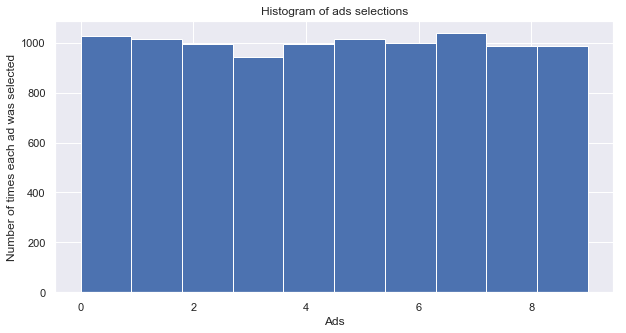

In [19]:
# Visualising the results
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

In [20]:
## Observation
## a nearly uniform distribution plot

In [22]:
## ---

# Case 2: Implementing UCB
## no simple package to implement, build from scratch
## see UCB steps documentation
import math
N = 10000
d = 10
ads_selected = [] #list of ad seected at each round
numbers_of_selections = [0] * d #vector of size d with just 0
sums_of_rewards = [0] * d
total_reward = 0 #declare initial value
for n in range(0, N):
    ad = 0 #initial to zero
    max_upper_bound = 0 #initial to zero
    for i in range(0, d):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward

print(total_reward)


2178


In [23]:
## Observation
## Total reward: 2178
## we have almost doubled the total reward of random selection
## look at last round, algorithm should always select the optimal
## as we get close to 10,000 we see that Ad version 5 is the most preferred
## we doubled our selection rate and also descovered the best ad to show
## Ad with highest  conversion

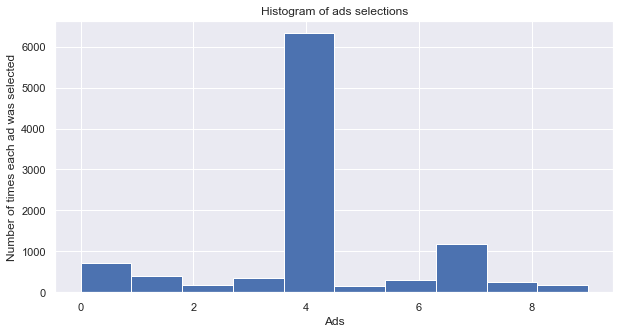

In [24]:
# Visualising the results of ad selected
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

In [25]:
## Observation
## Ad index 4 (5th Ad) was the most likely viewed ad
## can we do better?
## use thompson algorithm == do we get the same Ad version?

In [27]:
## ---

# Case 3: Implementing Thompson Sampling
import random
N = 10000
d = 10
ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range(0, d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    if reward == 1:
        numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
    else:
        numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
    total_reward = total_reward + reward
    
print(total_reward)

2614


In [28]:
## Observation:
## total reward = 2614
## checking multiple random variable, we are around 2600
## was the same Ad selected as UCB algorithom?

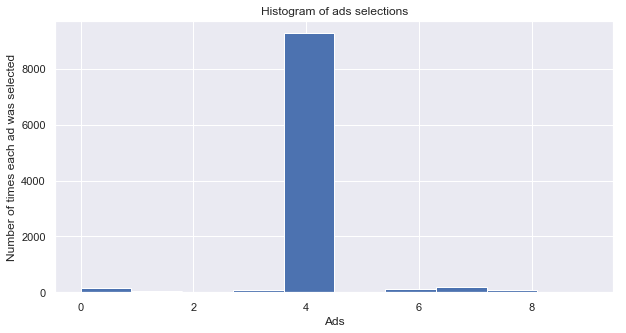

In [29]:
# Visualising the results - Histogram
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

In [30]:
## indeed, the same ad was selected 
## Ad index 4 (5th Ad) was the most likely viewed ad